# Installing Dependencies

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Palak Jain/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-29 Python-3.10.9 torch-2.1.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Image Detection

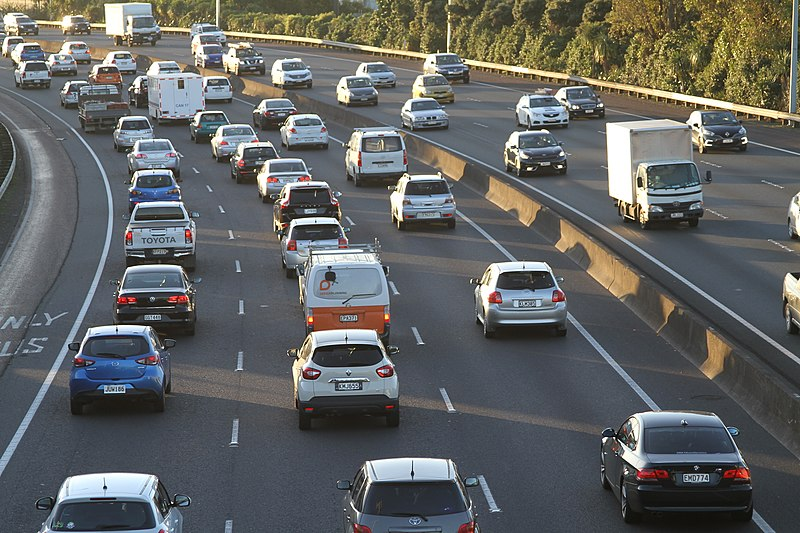

NameError: name 'model' is not defined

In [3]:
from PIL import Image
from IPython.display import display
img = Image.open('traffic_auckland.jpg')
# Display the image
display(img)

# Perform inference
results = model(img)
results.print()

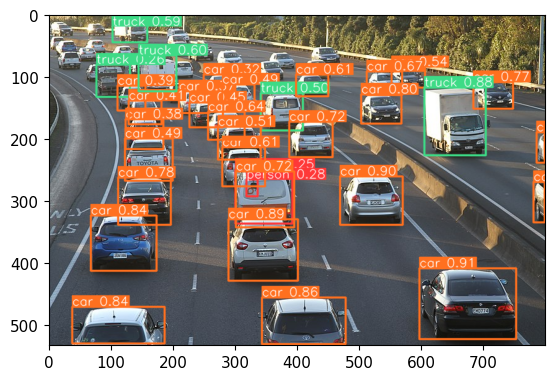

In [5]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# Real Time Detection

In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Video Detection

In [6]:
cap = cv2.VideoCapture('Stand_Park_Bridge.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train from scratch

In [4]:
import uuid   # Unique identifier
import os
import time

In [71]:
IMAGES_PATH = os.path.join('data', 'images_karan') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [72]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+'Karan'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [11]:
# print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.f0d54bbc-8ebd-11ee-a467-5c3a451d18bc.jpg


In [12]:
# for label in labels:
#     print('Collecting images for {}'.format(label))
#     for img_num in range(number_imgs):
#         print('Collecting images for {}, image number {}'.format(label, img_num))
#         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
#         print(imgname)

data\images\awake.f5266db4-8ebd-11ee-a6ae-5c3a451d18bc.jpg
data\images\awake.f5266fed-8ebd-11ee-abb2-5c3a451d18bc.jpg
data\images\awake.f5266fee-8ebd-11ee-a982-5c3a451d18bc.jpg
data\images\awake.f52683e6-8ebd-11ee-9330-5c3a451d18bc.jpg
data\images\awake.f52683e7-8ebd-11ee-a663-5c3a451d18bc.jpg
data\images\awake.f52683e8-8ebd-11ee-9210-5c3a451d18bc.jpg
data\images\awake.f52683e9-8ebd-11ee-bcba-5c3a451d18bc.jpg
data\images\awake.f52683ea-8ebd-11ee-b59e-5c3a451d18bc.jpg
data\images\awake.f52683eb-8ebd-11ee-9f58-5c3a451d18bc.jpg
data\images\awake.f52683ec-8ebd-11ee-a297-5c3a451d18bc.jpg
data\images\awake.f52683ed-8ebd-11ee-848c-5c3a451d18bc.jpg
data\images\awake.f52683ee-8ebd-11ee-b41f-5c3a451d18bc.jpg
data\images\awake.f52683ef-8ebd-11ee-9818-5c3a451d18bc.jpg
data\images\awake.f52683f0-8ebd-11ee-826b-5c3a451d18bc.jpg
data\images\awake.f526ac10-8ebd-11ee-9515-5c3a451d18bc.jpg
data\images\awake.f526ac11-8ebd-11ee-a816-5c3a451d18bc.jpg
data\images\awake.f526ac12-8ebd-11ee-85a9-5c3a451d18bc.j

# Load Custom Model

In [25]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Palak Jain/.cache\torch\hub\master.zip
YOLOv5  2023-12-4 Python-3.10.9 torch-2.1.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


image 1/1: 480x640 1 awake
Speed: 344.5ms pre-process, 375.4ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)


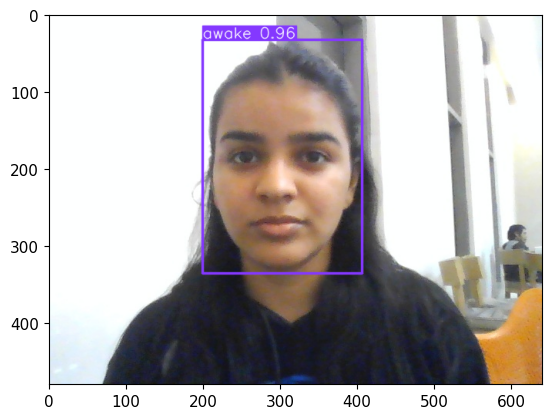

In [24]:
img = os.path.join('data', 'images', 'drowsy.Manya0bb89fce-9069-11ee-882b-5c3a451d18bc.jpg')
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 480x640 1 drowsy
Speed: 5.5ms pre-process, 372.4ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)


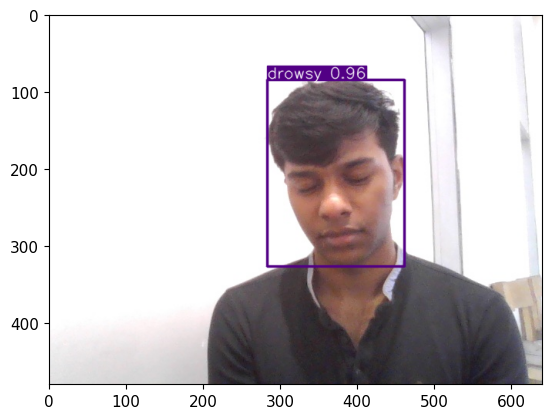

In [148]:

img = os.path.join('data', 'images', 'drowsy.Sarvesh9a35e83c-90f1-11ee-904e-5c3a451d18bc.jpg')
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
# # model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     # Make detections 
#     results = model(frame)    
#     cv2.imshow('YOLO', np.squeeze(results.render()))
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [26]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # Convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Make detections 
    results = model(frame_rgb)

    # Convert RGB back to BGR for display if needed
    results_bgr = cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_RGB2BGR)

    cv2.imshow('YOLO', results_bgr)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
